In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Prepare results table

In [2]:
gsea_folders = sorted([x for x in os.listdir('/DATA/users/magnitov/znf143/ttseq/gsea/') if 'Gsea' in x])
gsea_folders = [x for x in gsea_folders if 'GO_BP' in x or 'GO_CC' in x or 'Hallmarks' in x or 'ZFP143_target' in x]

gsea_data_2H = pd.DataFrame()
for folder in [x for x in gsea_folders if '2H' in x]:
    gsea_pos = pd.read_csv('/DATA/users/magnitov/znf143/ttseq/gsea/' + folder + '/gsea_report_for_na_pos_' + folder.split('.')[2] + '.tsv', sep = '\t')
    gsea_neg = pd.read_csv('/DATA/users/magnitov/znf143/ttseq/gsea/' + folder + '/gsea_report_for_na_neg_' + folder.split('.')[2] + '.tsv', sep = '\t')
    gsea_data_2H = pd.concat([gsea_data_2H, gsea_pos, gsea_neg])[['NAME', 'SIZE', 'NES', 'FDR q-val']]
gsea_data_2H.columns = ['NAME', 'SIZE', 'NES_2H', 'FDR_2H']

gsea_data_6H = pd.DataFrame()
for folder in [x for x in gsea_folders if '6H' in x]:
    gsea_pos = pd.read_csv('/DATA/users/magnitov/znf143/ttseq/gsea/' + folder + '/gsea_report_for_na_pos_' + folder.split('.')[2] + '.tsv', sep = '\t')
    gsea_neg = pd.read_csv('/DATA/users/magnitov/znf143/ttseq/gsea/' + folder + '/gsea_report_for_na_neg_' + folder.split('.')[2] + '.tsv', sep = '\t')
    gsea_data_6H = pd.concat([gsea_data_6H, gsea_pos, gsea_neg])[['NAME', 'SIZE', 'NES', 'FDR q-val']]
gsea_data_6H.columns = ['NAME', 'SIZE', 'NES_6H', 'FDR_6H']

gsea_data_24H = pd.DataFrame()
for folder in [x for x in gsea_folders if '24H' in x]:
    gsea_pos = pd.read_csv('/DATA/users/magnitov/znf143/ttseq/gsea/' + folder + '/gsea_report_for_na_pos_' + folder.split('.')[2] + '.tsv', sep = '\t')
    gsea_neg = pd.read_csv('/DATA/users/magnitov/znf143/ttseq/gsea/' + folder + '/gsea_report_for_na_neg_' + folder.split('.')[2] + '.tsv', sep = '\t')
    gsea_data_24H = pd.concat([gsea_data_24H, gsea_pos, gsea_neg])[['NAME', 'SIZE', 'NES', 'FDR q-val']]
gsea_data_24H.columns = ['NAME', 'SIZE', 'NES_24H', 'FDR_24H']

gsea_data = gsea_data_2H.merge(gsea_data_6H, on = ['NAME']).merge(gsea_data_24H, on = ['NAME'])
gsea_data = gsea_data[[x for x in gsea_data.columns if 'SIZE' not in x]]
gsea_data.head()

,NAME,NES_2H,FDR_2H,NES_6H,FDR_6H,NES_24H,FDR_24H
0,GOBP_RESPONSE_TO_PHENYLALANINE,1.917967,1.000000,2.099253,0.063471,2.090942,0.001763
1,GOBP_REGULATION_OF_RIBONUCLEASE_ACTIVITY,1.878682,0.960294,1.523254,0.799723,-0.779014,1.000000
2,GOBP_AMMONIUM_ION_METABOLIC_PROCESS,1.856387,0.880204,1.875517,0.365119,1.419378,0.246453
3,GOBP_STEROL_BIOSYNTHETIC_PROCESS,1.844332,0.779776,0.870201,0.995756,-1.308945,0.847701
4,GOBP_REGULATION_OF_MONOATOMIC_ANION_TRANSMEMBR...,1.804560,1.000000,1.449025,0.810724,1.632246,0.119815


In [3]:
gsea_data.to_csv('./annotations/gsea_ttseq.tsv', sep = '\t', header = 1, index = 0)

### Results analysis

In [6]:
gsea_data = pd.read_csv('./annotations/gsea_ttseq.tsv', sep = '\t')
gsea_data.head()

,NAME,NES_2H,FDR_2H,NES_6H,FDR_6H,NES_24H,FDR_24H
0,GOBP_RESPONSE_TO_PHENYLALANINE,1.917967,1.000000,2.099253,0.063471,2.090942,0.001763
1,GOBP_REGULATION_OF_RIBONUCLEASE_ACTIVITY,1.878682,0.960294,1.523254,0.799723,-0.779014,1.000000
2,GOBP_AMMONIUM_ION_METABOLIC_PROCESS,1.856387,0.880204,1.875517,0.365119,1.419378,0.246453
3,GOBP_STEROL_BIOSYNTHETIC_PROCESS,1.844332,0.779776,0.870201,0.995756,-1.308945,0.847701
4,GOBP_REGULATION_OF_MONOATOMIC_ANION_TRANSMEMBR...,1.804560,1.000000,1.449025,0.810724,1.632246,0.119815


In [7]:
gsea_data_significant = gsea_data[(gsea_data['FDR_2H'] < 0.05) | (gsea_data['FDR_6H'] < 0.05) | (gsea_data['FDR_24H'] < 0.05)]
gsea_data_significant

,NAME,NES_2H,FDR_2H,NES_6H,FDR_6H,NES_24H,FDR_24H
0,GOBP_RESPONSE_TO_PHENYLALANINE,1.917967,1.000000,2.099253,0.063471,2.090942,0.001763
30,GOBP_ENERGY_HOMEOSTASIS,1.658442,0.943949,2.083455,0.043696,1.996341,0.014105
67,GOBP_PIRNA_PROCESSING,1.537965,1.000000,1.966778,0.130942,2.129991,0.001055
234,GOBP_RESPONSE_TO_PROTOZOAN,1.384526,1.000000,1.339902,0.797985,2.056698,0.004130
248,GOBP_SIRNA_MEDIATED_RETROTRANSPOSON_SILENCING_...,1.378155,1.000000,1.785729,0.417709,1.919864,0.029218
...,...,...,...,...,...,...,...
8833,HALLMARK_PANCREAS_BETA_CELLS,-1.714596,0.009920,-1.446273,0.142693,0.992047,0.599085
8838,HALLMARK_KRAS_SIGNALING_UP,-1.079011,1.000000,-1.015994,0.946642,1.763409,0.008805
8845,HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,-0.966439,1.000000,1.015413,0.726262,1.972799,0.000988
8858,HALLMARK_APOPTOSIS,-0.697144,1.000000,-0.664320,1.000000,1.593163,0.030609


In [8]:
terms_to_plot = ['ZFP143_TARGET_GENES', 'GOBP_CYTOPLASMIC_TRANSLATION', 'GOBP_MITOCHONDRIAL_TRANSLATION', 
                 'GOCC_CYTOSOLIC_RIBOSOME', 'GOCC_ORGANELLAR_RIBOSOME', 'GOCC_RESPIRASOME',
                 'HALLMARK_OXIDATIVE_PHOSPHORYLATION', 'HALLMARK_MYC_TARGETS_V1', 'HALLMARK_MYC_TARGETS_V2',
                 'GOBP_ENERGY_HOMEOSTASIS', 'HALLMARK_INFLAMMATORY_RESPONSE', 'HALLMARK_APOPTOSIS']

gsea = gsea_data[gsea_data['NAME'].isin(terms_to_plot)]
gsea.sort_values(by = 'NAME', key=lambda column: column.map(lambda e: terms_to_plot.index(e)), inplace = True)
gsea

/tmp/ipykernel_1729264/3248640811.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gsea.sort_values(by = 'NAME', key=lambda column: column.map(lambda e: terms_to_plot.index(e)), inplace = True)


,NAME,NES_2H,FDR_2H,NES_6H,FDR_6H,NES_24H,FDR_24H
8861,ZFP143_TARGET_GENES,-2.856826,0.000000,-3.013367,0.000000,-3.322511,0.000000
3126,GOBP_CYTOPLASMIC_TRANSLATION,-1.746754,0.320215,-2.254600,0.000278,-2.127484,0.004812
3088,GOBP_MITOCHONDRIAL_TRANSLATION,-2.266263,0.000098,-2.329705,0.000047,-1.983634,0.037338
8114,GOCC_CYTOSOLIC_RIBOSOME,-1.853026,0.027766,-2.440793,0.000000,-2.275873,0.000000
8104,GOCC_ORGANELLAR_RIBOSOME,-2.188438,0.000038,-2.246417,0.000013,-1.976825,0.011791
8110,GOCC_RESPIRASOME,-2.020990,0.001343,-1.841530,0.029593,-1.966016,0.011441
8830,HALLMARK_OXIDATIVE_PHOSPHORYLATION,-1.939155,0.001617,-2.024105,0.000486,-2.049182,0.000440
8832,HALLMARK_MYC_TARGETS_V1,-1.798981,0.003941,-1.850819,0.003018,-2.024553,0.000278
8831,HALLMARK_MYC_TARGETS_V2,-1.924198,0.001050,-1.973400,0.000497,-2.029170,0.000270
30,GOBP_ENERGY_HOMEOSTASIS,1.658442,0.943949,2.083455,0.043696,1.996341,0.014105


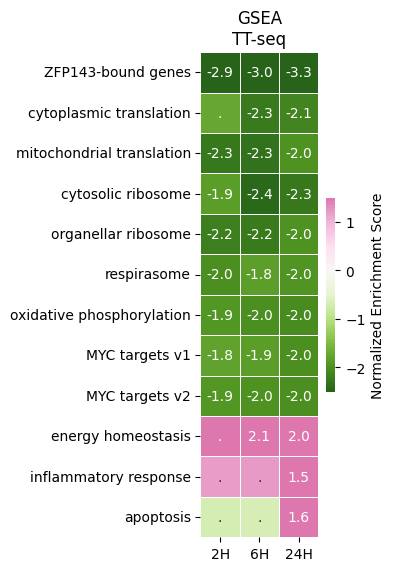

In [9]:
mask = gsea[['FDR_2H', 'FDR_6H', 'FDR_24H']] >= 0.05
mask_annotation = np.reshape(['.' if x==True else round(y, 1) for (x, y) in zip(mask.values.flatten(), gsea[['NES_2H', 'NES_6H', 'NES_24H']].values.flatten())], (len(gsea), 3))

plt.figure(figsize = (1.9, 6.3))
plt.title('GSEA\nTT-seq')
sns.heatmap(gsea[['NES_2H', 'NES_6H', 'NES_24H']], cmap = 'PiYG_r', center = 0, vmin = -2.5, vmax = 1.5, xticklabels = ['2H', '6H', '24H'], 
            yticklabels = [' '.join(x.split('_')[1:]).lower().replace('myc ', 'MYC ').replace('target ', 'ZFP143-bound ') for x in gsea['NAME'].values], 
            annot = np.array(mask_annotation), fmt='s', cbar = 2, cbar_kws = {'shrink': 0.4, 'label': 'Normalized Enrichment Score'}, linewidth = 0.5)
plt.show()